In [1]:
!pip install  opencv-python
!pip install tensorflow
!pip install scikit-learn

In [ ]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
from pathlib import Path
from PIL import Image
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.applications import MobileNetV2,EfficientNetB0,ResNet50
from tensorflow.keras.optimizers import Adam


## Data Augmentation Example

In [ ]:
img=cv2.imread('/content/drive/MyDrive/classification_dataset/test/bird/00347cbbeed4bedb_jpg.rf.aa19c9a7a22d76f8539ca12ac7cb82d5.jpg')

array([[[191, 172, 134],
        [191, 172, 134],
        [191, 172, 134],
        ...,
        [188, 180, 151],
        [188, 180, 150],
        [188, 180, 150]],

       [[191, 172, 134],
        [191, 172, 134],
        [191, 172, 134],
        ...,
        [188, 180, 151],
        [188, 180, 150],
        [188, 180, 150]],

       [[190, 174, 132],
        [190, 174, 132],
        [190, 174, 132],
        ...,
        [189, 178, 150],
        [189, 179, 149],
        [189, 179, 149]],

       ...,

       [[156, 152, 147],
        [162, 158, 153],
        [174, 170, 165],
        ...,
        [128, 120, 113],
        [129, 121, 114],
        [129, 121, 114]],

       [[137, 133, 128],
        [144, 140, 135],
        [153, 149, 144],
        ...,
        [130, 122, 115],
        [130, 122, 115],
        [130, 122, 115]],

       [[127, 123, 118],
        [129, 125, 120],
        [129, 125, 120],
        ...,
        [131, 123, 116],
        [132, 124, 117],
        [132, 124, 117]]], dtype=uint8)
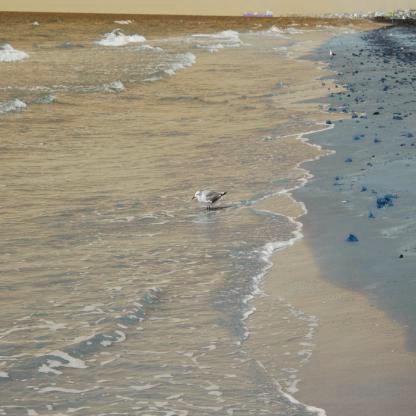

In [ ]:
img

array([[[188, 180, 150],
        [188, 180, 150],
        [188, 180, 151],
        ...,
        [191, 172, 134],
        [191, 172, 134],
        [191, 172, 134]],

       [[188, 180, 150],
        [188, 180, 150],
        [188, 180, 151],
        ...,
        [191, 172, 134],
        [191, 172, 134],
        [191, 172, 134]],

       [[189, 179, 149],
        [189, 179, 149],
        [189, 178, 150],
        ...,
        [190, 174, 132],
        [190, 174, 132],
        [190, 174, 132]],

       ...,

       [[129, 121, 114],
        [129, 121, 114],
        [128, 120, 113],
        ...,
        [174, 170, 165],
        [162, 158, 153],
        [156, 152, 147]],

       [[130, 122, 115],
        [130, 122, 115],
        [130, 122, 115],
        ...,
        [153, 149, 144],
        [144, 140, 135],
        [137, 133, 128]],

       [[132, 124, 117],
        [132, 124, 117],
        [131, 123, 116],
        ...,
        [129, 125, 120],
        [129, 125, 120],
        [127, 123, 118]]], dtype=uint8)
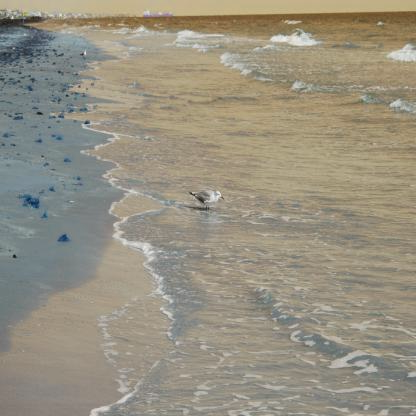

In [ ]:
#Horizontal Flipping
cv2.flip(img,1)

array([[[127, 123, 118],
        [129, 125, 120],
        [129, 125, 120],
        ...,
        [131, 123, 116],
        [132, 124, 117],
        [132, 124, 117]],

       [[137, 133, 128],
        [144, 140, 135],
        [153, 149, 144],
        ...,
        [130, 122, 115],
        [130, 122, 115],
        [130, 122, 115]],

       [[156, 152, 147],
        [162, 158, 153],
        [174, 170, 165],
        ...,
        [128, 120, 113],
        [129, 121, 114],
        [129, 121, 114]],

       ...,

       [[190, 174, 132],
        [190, 174, 132],
        [190, 174, 132],
        ...,
        [189, 178, 150],
        [189, 179, 149],
        [189, 179, 149]],

       [[191, 172, 134],
        [191, 172, 134],
        [191, 172, 134],
        ...,
        [188, 180, 151],
        [188, 180, 150],
        [188, 180, 150]],

       [[191, 172, 134],
        [191, 172, 134],
        [191, 172, 134],
        ...,
        [188, 180, 151],
        [188, 180, 150],
        [188, 180, 150]]], dtype=uint8)
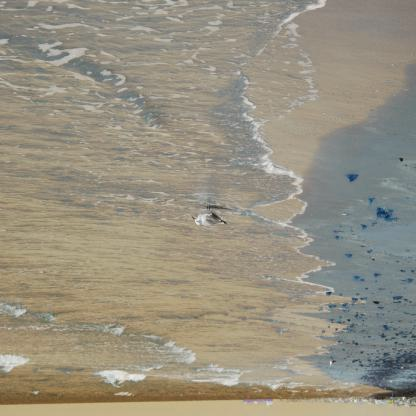

In [ ]:
#Vertical Flipping
cv2.flip(img,0)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
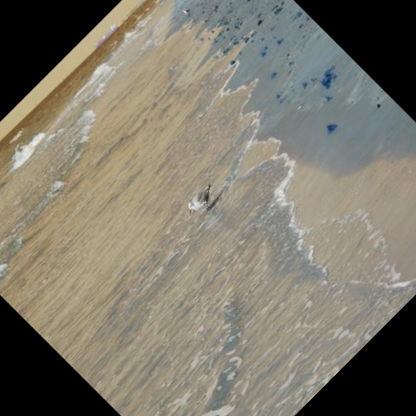

In [ ]:
#Rotating Image
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0) # 45 degrees, 1.0 scale
rotated_image = cv2.warpAffine(img, M, (w, h))
rotated_image


array([[[164, 152, 128],
        [165, 153, 129],
        [165, 153, 129],
        ...,
        [173, 162, 136],
        [173, 162, 136],
        [173, 161, 137]],

       [[165, 153, 129],
        [166, 154, 130],
        [166, 154, 130],
        ...,
        [173, 161, 136],
        [173, 161, 136],
        [173, 161, 137]],

       [[166, 154, 130],
        [166, 154, 130],
        [167, 155, 131],
        ...,
        [173, 161, 136],
        [173, 161, 136],
        [173, 160, 137]],

       ...,

       [[157, 150, 133],
        [157, 150, 133],
        [157, 150, 133],
        ...,
        [138, 136, 126],
        [138, 136, 127],
        [139, 137, 127]],

       [[153, 145, 129],
        [153, 145, 129],
        [153, 145, 129],
        ...,
        [137, 135, 126],
        [137, 135, 126],
        [137, 135, 126]],

       [[149, 142, 126],
        [149, 142, 126],
        [149, 142, 126],
        ...,
        [136, 134, 125],
        [136, 134, 125],
        [136, 134, 125]]], dtype=uint8)
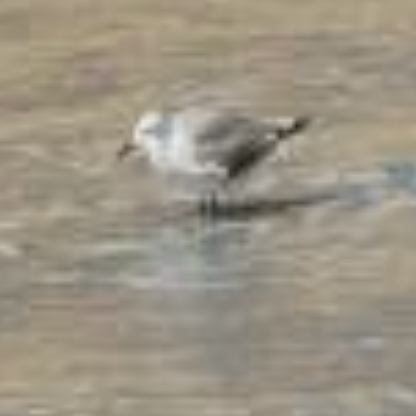

In [ ]:
M = cv2.getRotationMatrix2D(center, 0, 5.5) # 0 degrees, 5.5 scale
zoomed_image = cv2.warpAffine(img, M, (w, h))
zoomed_image

array([[[255, 255, 231],
        [255, 255, 231],
        [255, 255, 231],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 231],
        [255, 255, 231],
        [255, 255, 231],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 228],
        [255, 255, 228],
        [255, 255, 228],
        ...,
        [255, 255, 255],
        [255, 255, 254],
        [255, 255, 254]],

       ...,

       [[255, 255, 250],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [222, 210, 200],
        [224, 212, 201],
        [224, 212, 201]],

       [[236, 230, 222],
        [246, 240, 232],
        [255, 254, 246],
        ...,
        [225, 213, 202],
        [225, 213, 202],
        [225, 213, 202]],

       [[220, 214, 207],
        [224, 218, 210],
        [224, 218, 210],
        ...,
        [226, 214, 204],
        [228, 216, 206],
        [228, 216, 206]]], dtype=uint8)
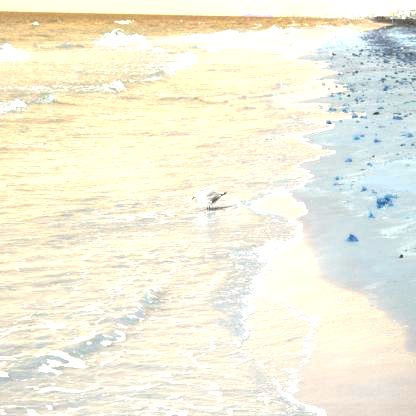

In [ ]:
#Brightness
alpha = 1.5  # Contrast control range(1.0-3.0)
beta = 30    # Brightness control range(0-100)
adjusted_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
adjusted_image

array([[[158, 140, 109],
        [162, 144, 113],
        [158, 140, 109],
        ...,
        [175, 167, 150],
        [171, 163, 146],
        [168, 161, 144]],

       [[162, 144, 113],
        [163, 145, 114],
        [157, 139, 108],
        ...,
        [159, 151, 134],
        [153, 146, 129],
        [150, 143, 126]],

       [[170, 153, 120],
        [169, 152, 119],
        [162, 145, 112],
        ...,
        [150, 143, 126],
        [148, 141, 126],
        [144, 137, 122]],

       ...,

       [[156, 149, 129],
        [153, 146, 126],
        [161, 154, 135],
        ...,
        [173, 162, 142],
        [174, 161, 139],
        [173, 160, 138]],

       [[162, 155, 136],
        [163, 156, 137],
        [156, 149, 132],
        ...,
        [170, 159, 139],
        [172, 159, 137],
        [173, 160, 138]],

       [[160, 153, 134],
        [155, 148, 129],
        [156, 149, 132],
        ...,
        [174, 163, 143],
        [174, 163, 141],
        [174, 163, 141]]], dtype=uint8)
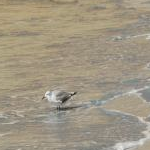

In [ ]:
#image Cropping
img[100:250, 150:300]

array([[[191, 172, 134],
        [191, 172, 134],
        [191, 172, 134],
        ...,
        [188, 179, 152],
        [188, 180, 151],
        [188, 180, 150]],

       [[189, 174, 132],
        [189, 174, 132],
        [189, 174, 132],
        ...,
        [189, 178, 151],
        [189, 178, 149],
        [189, 179, 149]],

       [[187, 174, 130],
        [187, 174, 130],
        [187, 174, 130],
        ...,
        [188, 177, 150],
        [188, 178, 148],
        [188, 178, 147]],

       ...,

       [[154, 151, 143],
        [148, 145, 137],
        [127, 124, 116],
        ...,
        [130, 122, 115],
        [130, 122, 115],
        [130, 122, 115]],

       [[154, 150, 145],
        [169, 165, 160],
        [172, 168, 163],
        ...,
        [129, 121, 114],
        [128, 120, 113],
        [129, 121, 114]],

       [[133, 129, 124],
        [140, 136, 131],
        [140, 136, 131],
        ...,
        [131, 123, 116],
        [130, 123, 116],
        [131, 123, 116]]], dtype=uint8)
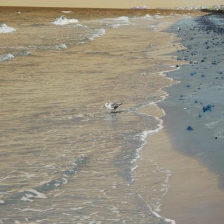

In [ ]:
#resizing to (224,224)
cv2.resize(img, (224, 224))


## CNN

In [3]:
train_dir = "/content/drive/MyDrive/classification_dataset/train"
val_dir = "/content/drive/MyDrive/classification_dataset/valid"
test_dir = "/content/drive/MyDrive/classification_dataset/test"

In [ ]:
# Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, # Converting Pixels [0,225] to [0,1] Basically I am normalizing/rescaling here
    rotation_range=20, # Randomly rotates images by up to ±20 degrees.
    zoom_range=0.2, # Randomly zooms into the image by up to 20%.
    horizontal_flip=True, # Randomly flips image left ↔ right.
    vertical_flip=True # Randomly flips image top ↔ bottom.
    # brightness_range=(0.7, 1.3)
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
img_size=(224,224) #Using img_size to resize every image to (224,224)
batch_size=32 
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary' # Since predicting 2 classes
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_data = val_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')   # bird vs drone(Using Binary Activation Function)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',Precision(),Recall()])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)
checkpoint = ModelCheckpoint(
    "Custom_model.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.5571 - loss: 0.8994 - precision_1: 0.5172 - recall_1: 0.5427 
Epoch 1: val_loss improved from inf to 0.57105, saving model to Custom_model.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 1688s 20s/step - accuracy: 0.5576 - loss: 0.8972 - precision_1: 0.5178 - recall_1: 0.5433 - val_accuracy: 0.6719 - val_loss: 0.5710 - val_precision_1: 0.6852 - val_recall_1: 0.6578
Epoch 2/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.7017 - loss: 0.5841 - precision_1: 0.7119 - recall_1: 0.6209
Epoch 2: val_loss improved from 0.57105 to 0.51211, saving model to Custom_model.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 45s 537ms/step - accuracy: 0.7019 - loss: 0.5838 - precision_1: 0.7122 - recall_1: 0.6209 - val_accuracy: 0.7443 - val_loss: 0.5121 - val_precision_1: 0.7642 - val_recall_1: 0.7200
Epoch 3/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.7473 - loss: 0.5025 - precision_1: 0.7750 - recall_1: 0.6364
Epoch 3: val_loss did not improve 

- Best validation loss was 0.36360 
- Trying to Improve my model by using Dropout layers, BatchNormalization

In [ ]:
model = models.Sequential([

    # Block 1
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',Precision(),Recall()])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 25,980,449 (99.11 MB)

 Trainable params: 25,979,041 (99.10 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [15]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.6719 - loss: 0.8833 - precision_2: 0.6627 - recall_2: 0.6285
Epoch 1: val_loss did not improve from 0.36370
84/84 ━━━━━━━━━━━━━━━━━━━━ 90s 767ms/step - accuracy: 0.6725 - loss: 0.8809 - precision_2: 0.6633 - recall_2: 0.6290 - val_accuracy: 0.4955 - val_loss: 0.6879 - val_precision_2: 0.7500 - val_recall_2: 0.0133
Epoch 2/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.7773 - loss: 0.4856 - precision_2: 0.7559 - recall_2: 0.7490
Epoch 2: val_loss did not improve from 0.36370
84/84 ━━━━━━━━━━━━━━━━━━━━ 45s 535ms/step - accuracy: 0.7772 - loss: 0.4858 - precision_2: 0.7560 - recall_2: 0.7489 - val_accuracy: 0.5181 - val_loss: 0.7016 - val_precision_2: 0.8000 - val_recall_2: 0.0711
Epoch 3/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.7836 - loss: 0.4707 - precision_2: 0.7867 - recall_2: 0.7661
Epoch 3: val_loss did not improve from 0.36370
84/84 ━━━━━━━━━━━━━━━━━━━━ 47s 556ms/step - accuracy: 0.7837 -

## Transfer Learning

### Using MobileNetV2

In [ ]:
# Loading Pretrained MobileNetV2
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # Freezing weights

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,427,713 (9.26 MB)

 Trainable params: 166,913 (652.00 KB)

 Non-trainable params: 2,260,800 (8.62 MB)

In [17]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.6938 - loss: 0.6347 - precision_3: 0.6669 - recall_3: 0.6947
Epoch 1: val_loss improved from 0.36370 to 0.21201, saving model to Custom_model.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 90s 839ms/step - accuracy: 0.6949 - loss: 0.6326 - precision_3: 0.6680 - recall_3: 0.6959 - val_accuracy: 0.9276 - val_loss: 0.2120 - val_precision_3: 0.9177 - val_recall_3: 0.9422
Epoch 2/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.8813 - loss: 0.2678 - precision_3: 0.8581 - recall_3: 0.8954
Epoch 2: val_loss improved from 0.21201 to 0.13870, saving model to Custom_model.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 43s 515ms/step - accuracy: 0.8815 - loss: 0.2676 - precision_3: 0.8584 - recall_3: 0.8955 - val_accuracy: 0.9502 - val_loss: 0.1387 - val_precision_3: 0.9552 - val_recall_3: 0.9467
Epoch 3/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.9261 - loss: 0.1831 - precision_3: 0.9181 - recall_3: 0.9265
Epoch 3: val_loss improved fr

In [19]:
from tensorflow import keras
best_model = keras.models.load_model("Custom_model.keras")
train_loss, train_acc, train_prec, train_rec = best_model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = best_model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = best_model.evaluate(test_data)
f1train = 2 * (train_prec * train_rec) / (train_prec + train_rec)
f1val = 2 * (val_prec * val_rec) / (val_prec + val_rec)
f1test = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print("Train Accuracy:", train_acc)
print("Train Precision:", train_prec)
print("Train Recall:", train_rec)
print("Train F1 Score:", f1train)
print("Train Loss:", train_loss)
print("                                     ")
print("Val Accuracy:", val_acc)
print("Val Precision:", val_prec)
print("Val Recall:", val_rec)
print("Val F1 Score:", f1val)
print("Val Loss:", val_loss)
print("                                     ")
print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", f1test)
print("Test Loss:", test_loss)

84/84 ━━━━━━━━━━━━━━━━━━━━ 51s 535ms/step - accuracy: 0.9852 - loss: 0.0425 - precision_3: 0.9801 - recall_3: 0.9882
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step - accuracy: 0.9763 - loss: 0.0665 - precision_3: 0.9882 - recall_3: 0.9642
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 628ms/step - accuracy: 0.9870 - loss: 0.0435 - precision_3: 0.9880 - recall_3: 0.9823
Train Accuracy: 0.9838467240333557
Train Precision: 0.9839357137680054
Train Recall: 0.9815705418586731
Train F1 Score: 0.9827517047605902
Train Loss: 0.04497237876057625
                                     
Val Accuracy: 0.970588207244873
Val Precision: 0.9818181991577148
Val Recall: 0.9599999785423279
Val F1 Score: 0.970786514358679
Val Loss: 0.0784863531589508
                                     
Test Accuracy: 0.9767441749572754
Test Precision: 0.9784946441650391
Test Recall: 0.9680851101875305
Test F1 Score: 0.9732620441534182
Test Loss: 0.06710698455572128


In [ ]:
base_model2 = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3)
    )

In [ ]:
base_model2.trainable = False  # Freezing weights

model = models.Sequential([
    base_model2,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,219,300 (16.10 MB)

 Trainable params: 166,913 (652.00 KB)

 Non-trainable params: 4,052,387 (15.46 MB)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)
checkpoint = ModelCheckpoint(
    "EfficientNetB0.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.5119 - loss: 0.9130 - precision_5: 0.4675 - recall_5: 0.5057
Epoch 1: val_loss improved from inf to 0.69691, saving model to EfficientNetB0.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 87s 766ms/step - accuracy: 0.5119 - loss: 0.9127 - precision_5: 0.4677 - recall_5: 0.5056 - val_accuracy: 0.4910 - val_loss: 0.6969 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.5124 - loss: 0.8624 - precision_5: 0.4689 - recall_5: 0.4931
Epoch 2: val_loss did not improve from 0.69691
84/84 ━━━━━━━━━━━━━━━━━━━━ 44s 518ms/step - accuracy: 0.5124 - loss: 0.8625 - precision_5: 0.4690 - recall_5: 0.4931 - val_accuracy: 0.4910 - val_loss: 0.7121 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 3/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.5109 - loss: 0.8664 - precision_5: 0.4820 - recall_5: 0.4825
Epoch 3: val_loss did not improve from 0.69691
84/84 ━━

In [ ]:
base_model3 = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
base_model3.trainable = False  # Freezing weights

model = models.Sequential([
    base_model3,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compiling Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,858,817 (91.01 MB)

 Trainable params: 266,753 (1.02 MB)

 Non-trainable params: 23,592,064 (90.00 MB)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)
checkpoint = ModelCheckpoint(
    "ResNet50.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.5816 - loss: 0.7647 - precision_6: 0.5709 - recall_6: 0.5550
Epoch 1: val_loss improved from inf to 0.64908, saving model to ResNet50.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 77s 730ms/step - accuracy: 0.5821 - loss: 0.7640 - precision_6: 0.5714 - recall_6: 0.5552 - val_accuracy: 0.6176 - val_loss: 0.6491 - val_precision_6: 0.7857 - val_recall_6: 0.3422
Epoch 2/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.6929 - loss: 0.6054 - precision_6: 0.6896 - recall_6: 0.6229
Epoch 2: val_loss improved from 0.64908 to 0.60423, saving model to ResNet50.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 46s 545ms/step - accuracy: 0.6929 - loss: 0.6055 - precision_6: 0.6896 - recall_6: 0.6229 - val_accuracy: 0.6719 - val_loss: 0.6042 - val_precision_6: 0.8125 - val_recall_6: 0.4622
Epoch 3/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.7147 - loss: 0.5883 - precision_6: 0.7143 - recall_6: 0.6397
Epoch 3: val_loss improved from 0.60423 t

In [ ]:
from sklearn.metrics import classification_report
test_data = val_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Loading best model
best_model = keras.models.load_model("Custom_model.keras")

# Getting true labels from test_data
y_true = test_data.classes

# Predict probabilities
y_pred_prob = best_model.predict(test_data)

# Convert probabilities → class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Generate classification report
print(classification_report(y_true, y_pred, target_names=["Bird", "Drone"]))


Found 215 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 999ms/step
              precision    recall  f1-score   support

        Bird       0.98      0.98      0.98       121
       Drone       0.98      0.97      0.97        94

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215



In [33]:
from tensorflow import keras
best_model = keras.models.load_model("Custom_model.keras")
train_loss, train_acc, train_prec, train_rec = best_model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = best_model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = best_model.evaluate(test_data)
f1train = 2 * (train_prec * train_rec) / (train_prec + train_rec)
f1val = 2 * (val_prec * val_rec) / (val_prec + val_rec)
f1test = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print("Train Accuracy:", train_acc)
print("Train Precision:", train_prec)
print("Train Recall:", train_rec)
print("Train F1 Score:", f1train)
print("Train Loss:", train_loss)
print("                                     ")
print("Val Accuracy:", val_acc)
print("Val Precision:", val_prec)
print("Val Recall:", val_rec)
print("Val F1 Score:", f1val)
print("Val Loss:", val_loss)
print("                                     ")
print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", f1test)
print("Test Loss:", test_loss)

84/84 ━━━━━━━━━━━━━━━━━━━━ 50s 513ms/step - accuracy: 0.9914 - loss: 0.0420 - precision_3: 0.9910 - recall_3: 0.9907
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.9738 - loss: 0.0783 - precision_3: 0.9854 - recall_3: 0.9611
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 739ms/step - accuracy: 0.9719 - loss: 0.0762 - precision_3: 0.9589 - recall_3: 0.9742
Train Accuracy: 0.9872276186943054
Train Precision: 0.988727867603302
Train Recall: 0.9839743375778198
Train F1 Score: 0.9863453754089204
Train Loss: 0.04647063463926315
                                     
Val Accuracy: 0.970588207244873
Val Precision: 0.9818181991577148
Val Recall: 0.9599999785423279
Val F1 Score: 0.970786514358679
Val Loss: 0.0784863606095314
                                     
Test Accuracy: 0.9767441749572754
Test Precision: 0.9784946441650391
Test Recall: 0.9680851101875305
Test F1 Score: 0.9732620441534182
Test Loss: 0.06710698455572128
